## DBSCAN 
- 복잡한 분포를 가진 데이터의 클러스터링

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
X, _ =make_moons(n_samples=300, noise=0.05, random_state=42)
X[:3]

array([[ 0.62251913, -0.37210134],
       [ 1.90426932, -0.13630295],
       [-0.06943128,  0.45611698]])

In [5]:
# DBSCAN 적용
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)


DBSCAN(eps=0.2)

In [8]:
import numpy as np
np.unique(dbscan.labels_)

array([0, 1])

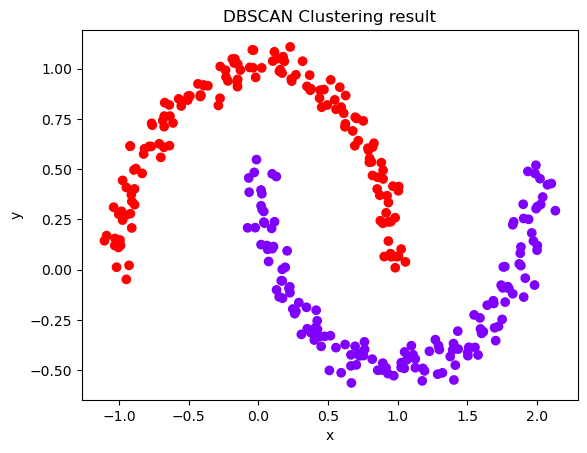

In [6]:
# 결과 시각화
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='rainbow')
plt.title("DBSCAN Clustering result")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


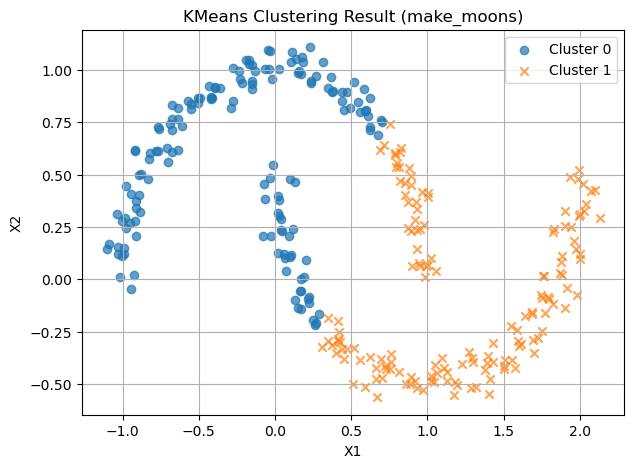

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# KMeans 군집화 (군집 개수 2개)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# 2D 시각화
plt.figure(figsize=(7,5))
for c, marker, color in zip([0, 1], ['o', 'x'], ['tab:blue', 'tab:orange']):
    plt.scatter(X[labels == c, 0], X[labels == c, 1],
                marker=marker, color=color, label=f'Cluster {c}', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('KMeans Clustering Result (make_moons)')
plt.legend()
plt.grid(True)
plt.show()

### iris dataset으로 DBSCAN

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width'
                                                , 'petal_length', 'petal_width'])
iris_df['target'] = iris.target

In [13]:
iris_dbscan=DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels=iris_dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster']=dbscan_labels
iris_df[:3]

,sepal_length,sepal_width,petal_length,petal_width,target,dbscan_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0


In [14]:
iris_df.groupby(['target'])['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64

In [16]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*', 'P', 'D', 'v']
    isNoise = False

    # 클러스터 중심이 있는 경우만 처리
    if iscenter and hasattr(clusterobj, 'clustercenters'):
        centers = clusterobj.clustercenters
    else:
        iscenter = False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        # noise(-1) 여부 확인
        if label == -1:
            cluster_legend = 'Noise'
            isNoise = True
        else:
            cluster_legend = f'Cluster {label}'

        marker_style = markers[label % len(markers)] if label != -1 else 'X'

        # 클러스터 점 찍기
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
                    s=70, edgecolor='k', marker=marker_style, label=cluster_legend)

        # 중심 표시
        if iscenter and label != -1:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        edgecolor='k', alpha=0.9, marker=marker_style)
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker=f'${label}$')

    plt.legend(loc='upper center' if isNoise else 'upper right')
    plt.title(f"Clustering result: {label_name}")
    plt.xlabel("ftr1 (PCA 1)")
    plt.ylabel("ftr2 (PCA 2)")
    plt.grid(True)
    plt.show()

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2, random_state=0)
pca_transformed=pca.fit_transform(iris.data)
iris_df['ftr1']=pca_transformed[:,0]
iris_df['ftr2']=pca_transformed[:,1]

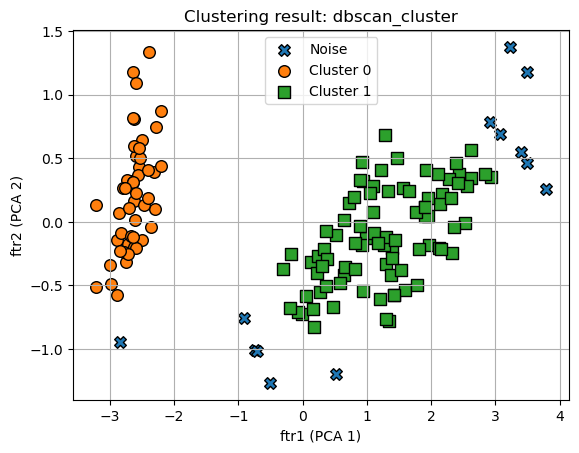

In [21]:
visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

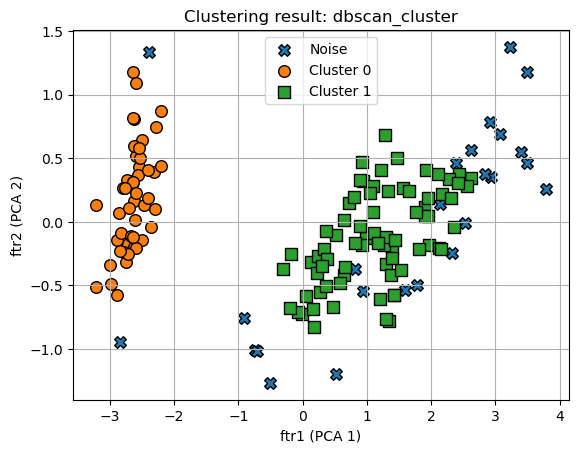

In [24]:
iris_dbscan=DBSCAN(eps=0.5, min_samples=8, metric='euclidean')
dbscan_labels=iris_dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

### 하이퍼파라미터 튜닝을 통해 잡음점 줄이기

In [29]:
def count_noise(labels):
    return (labels==-1).sum()
np.sum(labels==-1)

np.int64(8)

In [31]:
from sklearn.cluster import DBSCAN
import numpy as np

# 그리드 범위 설정
eps_list = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_list = [3, 5, 8, 10]

best_noise = len(iris.data)
best_params = None

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(iris.data)
        noise_count = np.sum(labels == -1)
        print(f"eps={eps}, min_samples={min_samples}, noise={noise_count}")
        if noise_count < best_noise:
            best_noise = noise_count
            best_params = (eps, min_samples)

print(f"\n최적의 조건: eps={best_params[0]}, min_samples={best_params[1]}, noise={best_noise}")

eps=0.3, min_samples=3, noise=67
eps=0.3, min_samples=5, noise=96
eps=0.3, min_samples=8, noise=118
eps=0.3, min_samples=10, noise=120
eps=0.4, min_samples=3, noise=22
eps=0.4, min_samples=5, noise=32
eps=0.4, min_samples=8, noise=66
eps=0.4, min_samples=10, noise=83
eps=0.5, min_samples=3, noise=10
eps=0.5, min_samples=5, noise=17
eps=0.5, min_samples=8, noise=26
eps=0.5, min_samples=10, noise=30
eps=0.6, min_samples=3, noise=5
eps=0.6, min_samples=5, noise=9
eps=0.6, min_samples=8, noise=13
eps=0.6, min_samples=10, noise=13
eps=0.7, min_samples=3, noise=3
eps=0.7, min_samples=5, noise=3
eps=0.7, min_samples=8, noise=6
eps=0.7, min_samples=10, noise=8

최적의 조건: eps=0.7, min_samples=3, noise=3


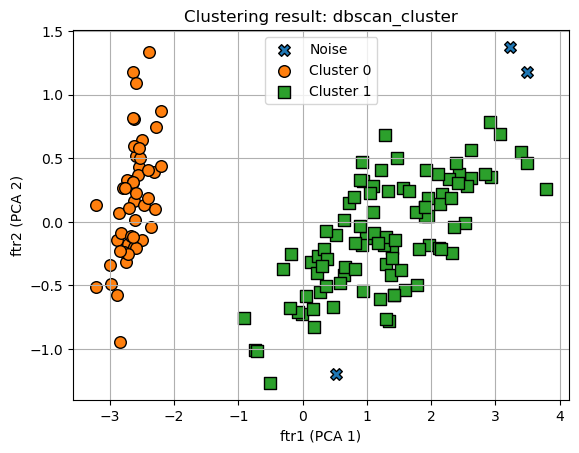

In [38]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# (1) PCA 2D 변환 (이미 했다면 이 부분 생략 가능)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
iris_df['ftr1'] = pca_transformed[:, 0]
iris_df['ftr2'] = pca_transformed[:, 1]

# (2) DBSCAN 최적 조건 적용
dbscan = DBSCAN(eps=0.7, min_samples=3)
labels = dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster'] = labels

# (3) 2D 시각화 함수
iris_dbscan=DBSCAN(eps=0.7, min_samples=3, metric='euclidean')
dbscan_labels=iris_dbscan.fit_predict(iris.data)
iris_df['dbscan_cluster']=dbscan_labels

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)
    
